In [109]:
import pandas as pd
import json
import matplotlib.pyplot as plt

with open('export_credo.json') as f:
    json_data = json.load(f)
    
detections = json_data["detections"]
df = pd.json_normalize(detections)
dataFrame = df.copy()

['id', 'accuracy', 'altitude', 'frame_content', 'height', 'width', 'x', 'y', 'latitude', 'longitude', 'provider', 'timestamp', 'time_received', 'source', 'visible', 'metadata', 'device_id', 'user_id', 'team_id']
0       2017-10-02 00:00:00+02:00
1       2017-10-02 00:00:00+02:00
2       2017-10-02 00:00:00+02:00
3       2017-10-02 00:00:00+02:00
4       2017-10-02 00:00:00+02:00
                   ...           
99995   2018-05-06 00:00:00+02:00
99996   2018-05-06 00:00:00+02:00
99997   2018-05-06 00:00:00+02:00
99998   2018-05-06 00:00:00+02:00
99999   2018-05-06 00:00:00+02:00
Name: timestamp, Length: 100000, dtype: datetime64[ns, Europe/Warsaw]


array([[<Axes: title={'center': 'timestamp'}>]], dtype=object)

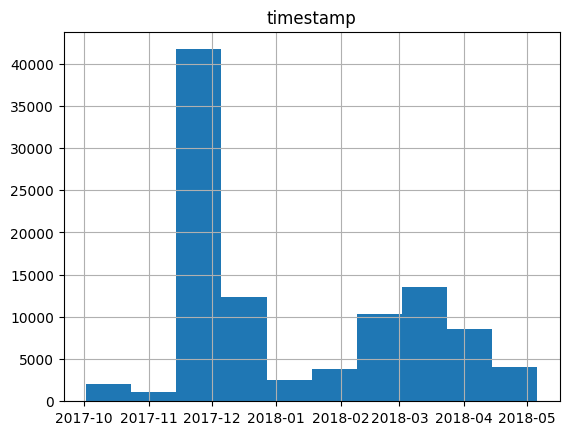

In [98]:
column_names = list(df.columns.values)
df['timestamp']=pd.to_datetime(dataFrame['timestamp'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('Europe/Warsaw')
gif = df[['device_id', 'latitude', 'longitude', 'timestamp']]
gif = gif.sort_values(by='timestamp').reset_index(drop=True)
gif['timestamp'] = gif['timestamp'].dt.round('D')
print(gif['timestamp'])
gif.hist('timestamp')


In [99]:
def strumień_czastek(data):
    time = 0
    surface = 0
    n = 0
    for device in data['device_id'].unique():
        size = data[data['device_id'] == device][['height', 'width']].head(1)
        surface += float(size['height'].values[0]) * float(size['width'].values[0])*10**(-10)
        time_stamps = data[data['device_id'] == device]['timestamp']
        time_stamps = time_stamps.sort_values().reset_index(drop=True)
        time_diffs = time_stamps.diff().dropna()
        time_diffs = pd.to_timedelta(time_diffs).dt.total_seconds()
        time_diffs = time_diffs[time_diffs<=300]
        n += len(time_diffs)+1
        time += time_diffs.sum()
    return n/(surface*time)

print(strumień_czastek(df[['device_id','height','width','timestamp']]))

4.616784436206122


In [128]:
import plotly.express as px
points = gif.groupby(['latitude', 'longitude']).size().reset_index(name='counts')
points['sizes'] = points['counts']/points['counts'].max() + 0.05
print(points)
points= points.drop(index=1)
fig = px.scatter_mapbox(points, lon=points['longitude'], lat=points["latitude"], color=points["counts"], size=points["sizes"], zoom=3, )
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

       latitude  longitude  counts     sizes
0    -32.616698 -70.716311      34  0.051177
1      0.000000   0.000000   28897  1.050000
2     20.211664  99.793387       6  0.050208
3     25.436981  34.688902       2  0.050069
4     40.638872  22.937864       4  0.050138
...         ...        ...     ...       ...
1564  56.746714  37.182060       6  0.050208
1565  56.746725  37.182028       2  0.050069
1566  56.746753  37.182022       1  0.050035
1567  60.385424   5.149779       4  0.050138
1568  60.386205   5.149301      80  0.052768

[1569 rows x 4 columns]
